In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("output_with_stats_columns.csv.gz")

In [6]:
df.columns

Index(['filenm', 'From', 'Sent', 'To', 'CC', 'Bcc', 'Subject', 'Attachments',
       'Importance', 'isThread', 'isAutoMessage', 'isDisplacement',
       'hasAllCapLine', 'hasBadDate', 'Body', 'nb_words', 'nb_chars',
       'body_len', 'body', 'Error_from', 'Error_sent', 'mn_nb_words',
       'std_nb_words', 'mn_nb_chars', 'std_nb_chars', 'count', 'email_count'],
      dtype='object')

In [8]:
df.describe()

,Bcc,nb_words,nb_chars,body_len,mn_nb_words,std_nb_words,mn_nb_chars,std_nb_chars,count,email_count
count,0.0,39444.000000,39444.000000,39444.000000,39444.000000,33795.000000,39444.000000,33795.000000,39444.000000,39444.000000
mean,NaN,274.482253,1526.380514,1799.862767,274.482253,582.420512,1526.380514,3099.847197,536.457864,536.457864
std,NaN,1498.709094,8150.989443,9638.763442,646.336143,1369.975738,3565.157932,7459.613097,974.900303,974.900303
min,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,NaN,40.000000,221.000000,261.000000,100.369863,109.656051,534.357798,597.608460,12.000000,12.000000
50%,NaN,96.000000,546.000000,646.000000,163.820106,164.752204,831.666667,865.478448,93.000000,93.000000
75%,NaN,199.000000,1156.000000,1347.000000,243.942857,391.273360,1318.228571,2072.168003,565.000000,565.000000
max,NaN,94406.000000,530506.000000,624911.000000,32261.000000,28069.534462,149301.000000,157701.876827,3459.000000,3459.000000


In [14]:
nb_words = df['nb_words'].values
type(nb_words)

numpy.ndarray

(0.0, 1000.0)

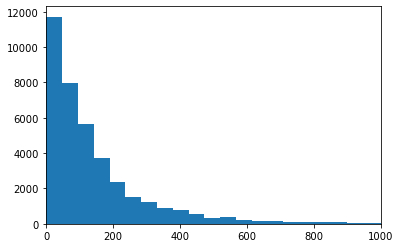

In [32]:
plt.hist(nb_words, bins=2000);
plt.xlim(0, 1000)

In [34]:
np.mean(nb_words), np.median(nb_words), np.std(nb_words)

(274.4822533211642, 96.0, 1498.6900964125693)

In [35]:
nb_words_without_outliers = nb_words[nb_words < 1500]

(array([7668., 6413., 4900., 3931., 3152., 2351., 1750., 1338.,  979.,
         965.,  716.,  573.,  515.,  487.,  419.,  293.,  215.,  227.,
         214.,  158.,  106.,   96.,  113.,   94.,   77.,   52.,   81.,
          43.,   69.,   65.,   37.,   47.,   43.,   34.,   25.,   48.,
          29.,   38.,   36.,   26.,   16.,   17.,   15.,   18.,   20.,
          18.,   23.,   18.,   18.,   13.]),
 array([1.00000e+00, 3.08200e+01, 6.06400e+01, 9.04600e+01, 1.20280e+02,
        1.50100e+02, 1.79920e+02, 2.09740e+02, 2.39560e+02, 2.69380e+02,
        2.99200e+02, 3.29020e+02, 3.58840e+02, 3.88660e+02, 4.18480e+02,
        4.48300e+02, 4.78120e+02, 5.07940e+02, 5.37760e+02, 5.67580e+02,
        5.97400e+02, 6.27220e+02, 6.57040e+02, 6.86860e+02, 7.16680e+02,
        7.46500e+02, 7.76320e+02, 8.06140e+02, 8.35960e+02, 8.65780e+02,
        8.95600e+02, 9.25420e+02, 9.55240e+02, 9.85060e+02, 1.01488e+03,
        1.04470e+03, 1.07452e+03, 1.10434e+03, 1.13416e+03, 1.16398e+03,
        1.19380e

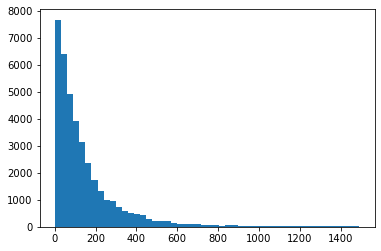

In [38]:
plt.hist(nb_words_without_outliers, bins=50)

In [37]:
np.mean(nb_words_without_outliers), np.median(nb_words_without_outliers)

(152.64395450659345, 93.0)

In [78]:
def plot_hist(ax, var, xlab="NEED LABEL"):
    std = np.std(var)
    var_without_outliers = var[np.where(var < std)]
    ax.hist(var_without_outliers, bins=50)
    ax.set_xlabel(xlab)
    plt.tight_layout()

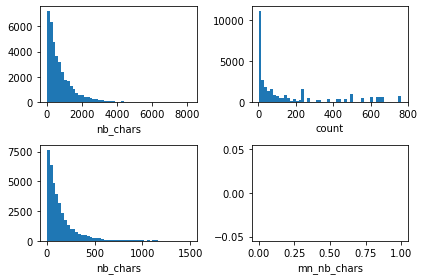

In [82]:
fig, axes = plt.subplots(2, 2)
plot_hist(axes[0,0], df['nb_chars'].values, 'nb_chars')
plot_hist(axes[1,0], df['nb_words'].values, 'nb_chars')
plot_hist(axes[0,1], df['count'].values, 'count')
plot_hist(axes[1,1], df['std_nb_chars'].values, 'mn_nb_chars')

0         3298.465917
1         5063.717627
2         8106.663649
3         3555.282145
4          686.257253
             ...     
39439      686.257253
39440      267.887868
39441      686.257253
39442    16523.119220
39443     1267.124838
Name: std_nb_chars, Length: 39444, dtype: float64

array([[<AxesSubplot:title={'center':'Bcc'}>,
        <AxesSubplot:title={'center':'nb_words'}>,
        <AxesSubplot:title={'center':'nb_chars'}>],
       [<AxesSubplot:title={'center':'body_len'}>,
        <AxesSubplot:title={'center':'mn_nb_words'}>,
        <AxesSubplot:title={'center':'std_nb_words'}>],
       [<AxesSubplot:title={'center':'mn_nb_chars'}>,
        <AxesSubplot:title={'center':'std_nb_chars'}>,
        <AxesSubplot:title={'center':'count'}>],
       [<AxesSubplot:title={'center':'email_count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

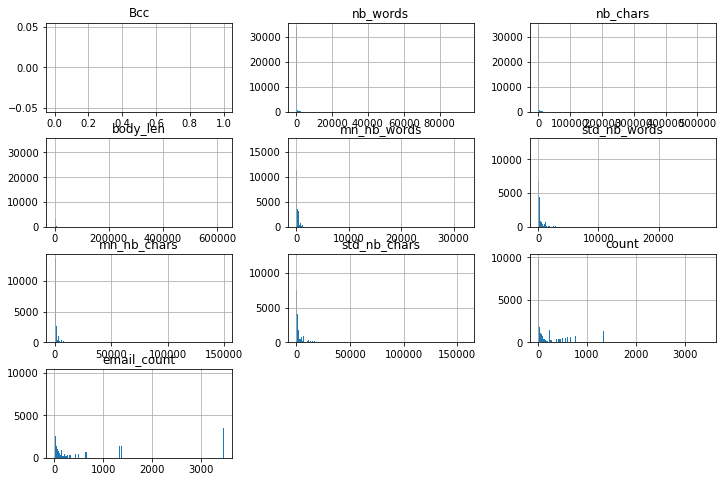

In [75]:
df.hist(figsize=(12,8), bins=300)